<a href="https://colab.research.google.com/github/taraponglab/QTox_PJ_BC/blob/main/phoneQTOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load fingerprint and class

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/taraponglab/QTox_PJ_BC/main/dataset/process/sweetener.csv")
df

,LigandID,class,canonical_smiles
0,1-[(Z)-(5-nitrofuran-2-yl)methylideneamino]imi...,1.0,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1
1,"3-[(Z)-(5-nitrofuran-2-yl)methylideneamino]-1,...",1.0,O=C1OCCN1/N=C/c1ccc([N+](=O)[O-])o1
2,[(Z)-(5-nitrofuran-2-yl)methylideneamino]urea,1.0,NC(=O)N/N=C/c1ccc([N+](=O)[O-])o1
3,2-[3-[(4-amino-2-methylpyrimidin-5-yl)methyl]-...,0.0,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1
4,"3-[(5-nitrofuran-2-yl)methylideneamino]-1,3-ox...",1.0,O=C1OCCN1N=Cc1ccc([N+](=O)[O-])o1
...,...,...,...
676,"1,6-dioxaspiro[2.5]octane",1.0,C1CC2(CCO1)CO2
677,6-tert-butyl-1-oxaspiro[2.5]octane,0.0,CC(C)(C)C1CCC2(CC1)CO2
678,"(1R,2R,3S,6R,7S,8S,9R,11S)-3,4,5,6,13,13-hexac...",0.0,ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@@H]4C[C@@H]([C@@H]...
679,"10,11-dihydroxy-2-(hydroxymethyl)-1,5-dimethyl...",0.0,CC1CC2OC3C(O)C(O)C(C)(C34CO4)C2(CO)C(=O)C1=O


In [11]:
df = df.set_index(df['LigandID'])
df

,LigandID,class,canonical_smiles
LigandID,,,
"1-[(Z)-(5-nitrofuran-2-yl)methylideneamino]imidazolidine-2,4-dione",1-[(Z)-(5-nitrofuran-2-yl)methylideneamino]imi...,1.0,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1
"3-[(Z)-(5-nitrofuran-2-yl)methylideneamino]-1,3-oxazolidin-2-one","3-[(Z)-(5-nitrofuran-2-yl)methylideneamino]-1,...",1.0,O=C1OCCN1/N=C/c1ccc([N+](=O)[O-])o1
[(Z)-(5-nitrofuran-2-yl)methylideneamino]urea,[(Z)-(5-nitrofuran-2-yl)methylideneamino]urea,1.0,NC(=O)N/N=C/c1ccc([N+](=O)[O-])o1
"2-[3-[(4-amino-2-methylpyrimidin-5-yl)methyl]-4-methyl-1,3-thiazol-3-ium-5-yl]ethanol",2-[3-[(4-amino-2-methylpyrimidin-5-yl)methyl]-...,0.0,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1
"3-[(5-nitrofuran-2-yl)methylideneamino]-1,3-oxazolidin-2-one","3-[(5-nitrofuran-2-yl)methylideneamino]-1,3-ox...",1.0,O=C1OCCN1N=Cc1ccc([N+](=O)[O-])o1
...,...,...,...
"1,6-dioxaspiro[2.5]octane","1,6-dioxaspiro[2.5]octane",1.0,C1CC2(CCO1)CO2
6-tert-butyl-1-oxaspiro[2.5]octane,6-tert-butyl-1-oxaspiro[2.5]octane,0.0,CC(C)(C)C1CCC2(CC1)CO2
"(1R,2R,3S,6R,7S,8S,9R,11S)-3,4,5,6,13,13-hexachloro-10-oxapentacyclo[6.3.1.13,6.02,7.09,11]tridec-4-ene","(1R,2R,3S,6R,7S,8S,9R,11S)-3,4,5,6,13,13-hexac...",0.0,ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@@H]4C[C@@H]([C@@H]...


In [12]:
df = df.drop(['LigandID'], axis = 1)
df

,class,canonical_smiles
LigandID,,
"1-[(Z)-(5-nitrofuran-2-yl)methylideneamino]imidazolidine-2,4-dione",1.0,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1
"3-[(Z)-(5-nitrofuran-2-yl)methylideneamino]-1,3-oxazolidin-2-one",1.0,O=C1OCCN1/N=C/c1ccc([N+](=O)[O-])o1
[(Z)-(5-nitrofuran-2-yl)methylideneamino]urea,1.0,NC(=O)N/N=C/c1ccc([N+](=O)[O-])o1
"2-[3-[(4-amino-2-methylpyrimidin-5-yl)methyl]-4-methyl-1,3-thiazol-3-ium-5-yl]ethanol",0.0,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1
"3-[(5-nitrofuran-2-yl)methylideneamino]-1,3-oxazolidin-2-one",1.0,O=C1OCCN1N=Cc1ccc([N+](=O)[O-])o1
...,...,...
"1,6-dioxaspiro[2.5]octane",1.0,C1CC2(CCO1)CO2
6-tert-butyl-1-oxaspiro[2.5]octane,0.0,CC(C)(C)C1CCC2(CC1)CO2
"(1R,2R,3S,6R,7S,8S,9R,11S)-3,4,5,6,13,13-hexachloro-10-oxapentacyclo[6.3.1.13,6.02,7.09,11]tridec-4-ene",0.0,ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@@H]4C[C@@H]([C@@H]...


In [13]:
df_substruc = pd.read_csv("https://raw.githubusercontent.com/taraponglab/QTox_PJ_BC/main/dataset/process/figerprintsawsub.csv")
df_substruc

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,AUTOGEN_smilesaw_1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
1,AUTOGEN_smilesaw_2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
2,AUTOGEN_smilesaw_3,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
3,AUTOGEN_smilesaw_4,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,AUTOGEN_smilesaw_5,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,AUTOGEN_smilesaw_677,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
677,AUTOGEN_smilesaw_678,1,1,1,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
678,AUTOGEN_smilesaw_679,0,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
679,AUTOGEN_smilesaw_680,1,1,1,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1


In [14]:
#เชื่อม index
#drop name
#เชื่อม class
df_substruc = df_substruc.set_index(df.index)
df_substruc = df_substruc.drop(["Name"], axis=1)
df_substruc = pd.concat([df['class'], df_substruc], axis=1)
df_substruc

,class,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
LigandID,,,,,,,,,,,,,,,,,,,,,
"1-[(Z)-(5-nitrofuran-2-yl)methylideneamino]imidazolidine-2,4-dione",1.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
"3-[(Z)-(5-nitrofuran-2-yl)methylideneamino]-1,3-oxazolidin-2-one",1.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
[(Z)-(5-nitrofuran-2-yl)methylideneamino]urea,1.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
"2-[3-[(4-amino-2-methylpyrimidin-5-yl)methyl]-4-methyl-1,3-thiazol-3-ium-5-yl]ethanol",0.0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
"3-[(5-nitrofuran-2-yl)methylideneamino]-1,3-oxazolidin-2-one",1.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,6-dioxaspiro[2.5]octane",1.0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6-tert-butyl-1-oxaspiro[2.5]octane,0.0,1,1,1,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
"(1R,2R,3S,6R,7S,8S,9R,11S)-3,4,5,6,13,13-hexachloro-10-oxapentacyclo[6.3.1.13,6.02,7.09,11]tridec-4-ene",0.0,0,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [15]:
df_substruc.to_csv('/content/drive/MyDrive/Test/fingerprint_class_substruc_sweetener.csv')

Define x and y - Split train test

In [16]:
from sklearn.model_selection import train_test_split
x = df_substruc.drop(['class'], axis=1)
y = df_substruc['class']
#split 70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)
print("Number of molecules in train", len(x_train))
print("Number of molecules in test", len(x_test))

Number of molecules in train 476
Number of molecules in test 205


Feature reduction

In [17]:
def remove_constant_string_des(df):
    #delete string value
    df = df.select_dtypes(exclude=['object'])
    #delete constant value
    for column in df.columns:
        if df[column].nunique() == 1:  # This checks if the column has only one unique value
            df = df.drop(column, axis=1)  # This drops the column from the DataFrame
    return df

In [18]:
def remove_highly_correlated_features(df, threshold=0.7):
    # Compute pairwise correlation of columns
    corr_matrix = df.corr().abs()
    # Create a mask for the upper triangle
    upper = corr_matrix.where(
        pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool),
                     index=corr_matrix.index, columns=corr_matrix.columns)
    )
    # Identify columns to drop based on threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop the columns from the DataFrame
    df_dropped = df.drop(columns=to_drop)
    return df_dropped

In [19]:
#ลบ ค่าคงที่
x_train_reduce = remove_constant_string_des(x_train)
#ลบตัวแปรที่มีความสัมพันธ์สูง
x_train_reduce = remove_highly_correlated_features(x_train_reduce, threshold=0.7)
x_train_reduce

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP8,SubFP9,SubFP10,SubFP11,...,SubFP281,SubFP284,SubFP287,SubFP288,SubFP291,SubFP295,SubFP300,SubFP302,SubFP303,SubFP304
LigandID,,,,,,,,,,,,,,,,,,,,,
methyl 2-carbamoyl-3-ethyl-3-(1-hydroxyethyl)oxirane-2-carboxylate,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
(2R)-2-[[(2R)-2-ethylhexoxy]methyl]oxirane,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3-(bromomethyl)-4-chloro-2H-furan-5-one,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,1,0
"6-(5-nitrofuran-2-yl)-1,3,5-triazine-2,4-diamine",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
"tributyl 2-acetyloxypropane-1,2,3-tricarboxylate",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ethyl 3-[(4-acetamidophenyl)methylideneamino]-1H-indole-2-carboxylate,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
"(1S,2R,3S,4R,5R)-5-(1,3-dihydroxypropan-2-ylamino)-1-(hydroxymethyl)cyclohexane-1,2,3,4-tetrol",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
butyl 3-(5-nitrofuran-2-yl)prop-2-enoate,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,0


In [20]:
#ลดตัวแปร test ให้เหมือน train
x_test_reduce = x_test[x_train_reduce.columns]
x_test_reduce

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP8,SubFP9,SubFP10,SubFP11,...,SubFP281,SubFP284,SubFP287,SubFP288,SubFP291,SubFP295,SubFP300,SubFP302,SubFP303,SubFP304
LigandID,,,,,,,,,,,,,,,,,,,,,
"2-amino-5-[[1-(carboxymethylamino)-1-oxo-3-(1,2,2-trichloroethenylsulfanyl)propan-2-yl]amino]-5-oxopentanoic acid",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2-[(5-nitrofuran-2-yl)methylidene]propanedinitrile,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,0
"1-(2-chloroethyl)-3-(5-nitro-1,3-thiazol-2-yl)urea",0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
N-(2-bromophenyl)-5-nitrothiophene-3-carboxamide,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
"5-hydroperoxy-10,13-dimethyl-17-(6-methylheptan-2-yl)-1,2,3,4,8,9,11,12,14,15,16,17-dodecahydrocyclopenta[a]phenanthren-3-ol",1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2-[(4-methylanilino)methyl]oxane-2,3,4,5-tetrol",1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,1,0,0
"[(1S,3aS,3bR,9aR,9bS,11aS)-9a,11a-dimethyl-7-oxo-1,2,3,3a,3b,4,6,8,9,9b,10,11-dodecahydroindeno[5,4-f]quinolin-1-yl] 4-[4-[bis(2-chloroethyl)amino]phenyl]butanoate",1,1,1,1,0,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
(Z)-3-(5-nitrofuran-2-yl)-N-propan-2-ylprop-2-enamide,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,0


Random Forest Classification

In [21]:
from numpy.lib.shape_base import column_stack
#Load packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#model construction
model = RandomForestClassifier (n_estimators=100, random_state = 1).fit(x_train_reduce, y_train)

#make prediction
y_tr_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_te_pred = model.predict(x_test_reduce)

#Calculate accuracy
acc_tr = accuracy_score(y_train, y_tr_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_te_pred)

#Calculate precision
pre_tr = precision_score(y_train, y_tr_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_te_pred)

#Calculate sensitivity (recall)
sen_tr = recall_score(y_train, y_tr_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_te_pred)

#สร้าง function คำนวณ specificity
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_train, y_tr_pred).ravel()
  specificity = tn / (tn +fp)
  return specificity

#Calculate specificity
spe_tr = specificity_score(y_train, y_tr_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_te_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
acc_tr,
acc_cv,
acc_te,
pre_tr,
pre_cv,
pre_te,
sen_tr,
sen_cv,
sen_te,
spe_tr,
spe_cv,
spe_te, ]

columns = [
'acc_tr',
'acc_cv',
'acc_te',
'pre_tr',
'pre_cv',
'pre_te',
'sen_tr',
'sen_cv',
'sen_te',
'spe_tr',
'spe_cv',
'spe_te' ,]

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/Test/result_randomforest.csv')
df_result


,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.987395,0.798319,0.77561,0.980769,0.81746,0.793103,0.996094,0.804688,0.71134,0.977273,0.977273,0.977273


In [22]:
#Fine tune model
#Load packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#Fine tune model
param_grid = {
    'n_estimators': [10,100,1000],
    'max_depth' : [5,10,20],
    'max_features' : [10,20,30],
}
model_finetune = RandomForestClassifier (random_state = 1)
grid_search = GridSearchCV(estimator = model_finetune, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose=3).fit(x_train_reduce, y_train)
#print fine tune result
print(grid_search.best_score_)
print(grid_search.best_params_)

#model construction
model = RandomForestClassifier (**grid_search.best_params_).fit(x_train_reduce, y_train)

#make prediction
y_tr_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_te_pred = model.predict(x_test_reduce)

#Calculate accuracy
acc_tr = accuracy_score(y_train, y_tr_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_te_pred)

#Calculate precision
pre_tr = precision_score(y_train, y_tr_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_te_pred)

#Calculate sensitivity (recall)
sen_tr = recall_score(y_train, y_tr_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_te_pred)

#สร้าง function คำนวณ specificity
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_train, y_tr_pred).ravel()
  specificity = tn / (tn +fp)
  return specificity

#Calculate specificity
spe_tr = specificity_score(y_train, y_tr_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_te_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
acc_tr,
acc_cv,
acc_te,
pre_tr,
pre_cv,
pre_te,
sen_tr,
sen_cv,
sen_te,
spe_tr,
spe_cv,
spe_te, ]

columns = [
'acc_tr',
'acc_cv',
'acc_te',
'pre_tr',
'pre_cv',
'pre_te',
'sen_tr',
'sen_cv',
'sen_te',
'spe_tr',
'spe_cv',
'spe_te' ,]

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/Test/result_randomforest_finetune.csv')
df_result

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.653 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.779 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.695 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.695 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.719 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.695 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.789 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.695 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.611 total time=   0.3s
[CV 1/5] END 

,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.936975,0.785714,0.785366,0.95935,0.840708,0.811765,0.921875,0.742188,0.71134,0.954545,0.954545,0.954545


In [28]:
#grid_search.best_params_
#Fine tune model
#Load packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#Fine tune model
param_grid = {
    'n_estimators': [10,20,50,100,200,500,1000],
    'max_depth' : [2,3,5,10,15,20,25,30],
    'max_features' : [5,10,15,20,25,30,50],
    'random_state' : [1]
}
model_finetune = RandomForestClassifier (random_state = 1)
grid_search = GridSearchCV(estimator = model_finetune, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose=3).fit(x_train_reduce, y_train)
#print fine tune result
print(grid_search.best_score_)
print(grid_search.best_params_)
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid.to_csv('/content/drive/MyDrive/Test/result_randomforest_finetune_grid.csv')

#model construction
model = RandomForestClassifier (**grid_search.best_params_).fit(x_train_reduce, y_train)

#make prediction
y_tr_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_te_pred = model.predict(x_test_reduce)

#Calculate accuracy
acc_tr = accuracy_score(y_train, y_tr_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_te_pred)

#Calculate precision
pre_tr = precision_score(y_train, y_tr_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_te_pred)

#Calculate sensitivity (recall)
sen_tr = recall_score(y_train, y_tr_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_te_pred)

#สร้าง function คำนวณ specificity
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_train, y_tr_pred).ravel()
  specificity = tn / (tn +fp)
  return specificity

#Calculate specificity
spe_tr = specificity_score(y_train, y_tr_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_te_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
acc_tr,
acc_cv,
acc_te,
pre_tr,
pre_cv,
pre_te,
sen_tr,
sen_cv,
sen_te,
spe_tr,
spe_cv,
spe_te, ]

columns = [
'acc_tr',
'acc_cv',
'acc_te',
'pre_tr',
'pre_cv',
'pre_te',
'sen_tr',
'sen_cv',
'sen_te',
'spe_tr',
'spe_cv',
'spe_te' ,]

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/Test/result_randomforest_finetune_diff1.csv')
df_result


Fitting 5 folds for each of 392 candidates, totalling 1960 fits
[CV 1/5] END max_depth=2, max_features=5, n_estimators=10, random_state=1;, score=0.646 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=5, n_estimators=10, random_state=1;, score=0.632 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=5, n_estimators=10, random_state=1;, score=0.705 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=5, n_estimators=10, random_state=1;, score=0.653 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=5, n_estimators=10, random_state=1;, score=0.674 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=5, n_estimators=20, random_state=1;, score=0.667 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=5, n_estimators=20, random_state=1;, score=0.632 total time=   0.1s
[CV 3/5] END max_depth=2, max_features=5, n_estimators=20, random_state=1;, score=0.716 total time=   0.1s
[CV 4/5] END max_depth=2, max_features=5, n_estimators=20, random_state=1;, scor

KeyboardInterrupt: ignored

In [29]:
#Load packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#model construction
model = RandomForestClassifier (n_estimators=1000, max_depth=15, max_features=50, random_state = 1).fit(x_train_reduce, y_train)
from joblib import load, dump
dump(model, '/content/drive/MyDrive/Test/model_substruc.joblib')

#make prediction
y_tr_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_te_pred = model.predict(x_test_reduce)

#Calculate accuracy
acc_tr = accuracy_score(y_train, y_tr_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_te_pred)

#Calculate precision
pre_tr = precision_score(y_train, y_tr_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_te_pred)

#Calculate sensitivity (recall)
sen_tr = recall_score(y_train, y_tr_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_te_pred)

#สร้าง function คำนวณ specificity
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_train, y_tr_pred).ravel()
  specificity = tn / (tn +fp)
  return specificity

#Calculate specificity
spe_tr = specificity_score(y_train, y_tr_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_te_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
acc_tr,
acc_cv,
acc_te,
pre_tr,
pre_cv,
pre_te,
sen_tr,
sen_cv,
sen_te,
spe_tr,
spe_cv,
spe_te, ]

columns = [
'acc_tr',
'acc_cv',
'acc_te',
'pre_tr',
'pre_cv',
'pre_te',
'sen_tr',
'sen_cv',
'sen_te',
'spe_tr',
'spe_cv',
'spe_te' ,]

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/Test/result_randomforest_runtime.csv')
df_result


,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.97479,0.815126,0.809756,0.988,0.847107,0.853659,0.964844,0.800781,0.721649,0.986364,0.986364,0.986364


สร้างกราฟ ROC

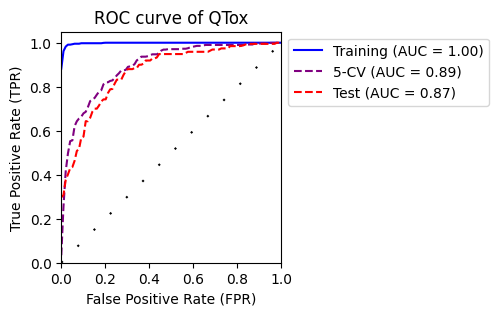

In [41]:
from sklearn.metrics import roc_curve, auc
#เก็บข้อมูล fpr tpr
fpr = dict()
tpr = dict()
roc_auc = dict()

#กำหนด class
n_classes = 2
classes = ["nonmutagenic", "mutagenic"]

# Compute the ROC curve for each class
y_tr_proba = model.predict_proba(x_train_reduce)
y_cv_proba = cross_val_predict(model, x_train_reduce, y_train, cv=5, method='predict_proba')
y_te_proba = model.predict_proba(x_test_reduce)

#สร้าง roc train
for i in range(2):  # 2 classes
    fpr[i], tpr[i], _ = roc_curve(y_train, y_tr_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average AUC across classes
average_auc = np.mean(list(roc_auc.values()))

# Compute average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
mean_auc = auc(mean_fpr, mean_tpr)

#graph
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.plot(mean_fpr, mean_tpr, label='Training (AUC = %0.2f)' % mean_auc, linestyle='solid', color='Blue')

#สร้าง cv
for i in range(2):  #  2 classes
    fpr[i], tpr[i], _ = roc_curve(y_train, y_cv_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values()))
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label='5-CV (AUC = %0.2f)' % mean_auc, linestyle='dashed', color='purple')

#สร้าง test
for i in range(2):  #  2 classes
    fpr[i], tpr[i], _ = roc_curve(y_test, y_te_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values()))
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label='Test (AUC = %0.2f)' % mean_auc, linestyle='dashed', color='red')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle=(0, (1, 10)), color='black')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=10)
plt.ylabel('True Positive Rate (TPR)', fontsize=10)
plt.title('ROC curve of QTox', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.savefig('/content/drive/MyDrive/Test/roc_curveQTox.png', dpi=500, bbox_inches='tight')
plt.show()


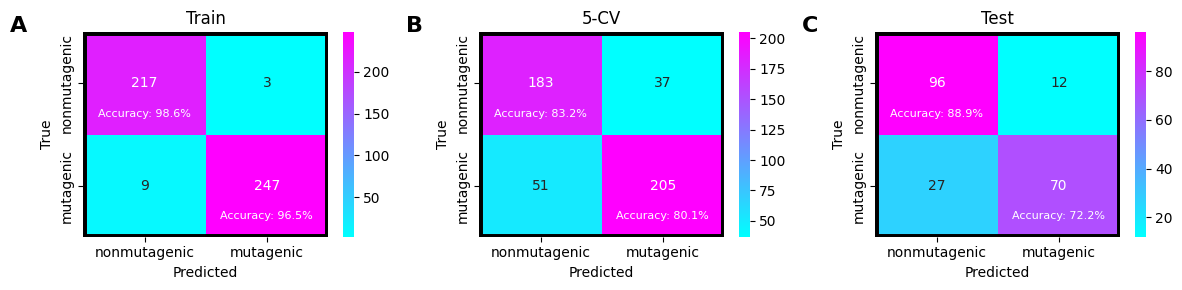

In [50]:
#load package
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

#define class
classes = ["nonmutagenic", "mutagenic"]

#plot
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.tight_layout(w_pad=5, h_pad=5)
texts = ['A', 'B', 'C']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.3, 1.0), xycoords="axes fraction", fontsize=16, weight='bold')

#train
plt.subplot(1,3,1)
cm = confusion_matrix(y_train, y_tr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', xticklabels=classes, yticklabels=classes)

# Accuracy for each class
class_accuracy = (np.diag(cm) / np.sum(cm, axis=1)) *100
for i in range(len(classes)):
    plt.text(i + 0.5, i +0.8, f'Accuracy: {class_accuracy[i]:.1f}%',
             ha='center', va='center', color='white', fontsize=8)
plt.gca().add_patch(patches.Rectangle((0, 0), 2, 2, fill=False, edgecolor='black', linewidth=5))
plt.title('Train')
plt.xlabel('Predicted')
plt.ylabel('True')

#CV
plt.subplot(1,3,2)
cm = confusion_matrix(y_train, y_cv_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', xticklabels=classes, yticklabels=classes)
# Calculate precision and recall for each class
# Accuracy for each class
class_accuracy = (np.diag(cm) / np.sum(cm, axis=1)) *100
for i in range(len(classes)):
    plt.text(i + 0.5, i +0.8, f'Accuracy: {class_accuracy[i]:.1f}%',
             ha='center', va='center', color='white', fontsize=8)
plt.gca().add_patch(patches.Rectangle((0, 0), 2, 2, fill=False, edgecolor='black', linewidth=5))
plt.title('5-CV')
plt.xlabel('Predicted')
plt.ylabel('True')

#test
plt.subplot(1,3,3)
cm = confusion_matrix(y_test, y_te_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', xticklabels=classes, yticklabels=classes)
# Accuracy for each class
class_accuracy = (np.diag(cm) / np.sum(cm, axis=1)) *100
for i in range(len(classes)):
    plt.text(i + 0.5, i +0.8, f'Accuracy: {class_accuracy[i]:.1f}%', ha='center', va='center', color='white', fontsize=8)
plt.gca().add_patch(patches.Rectangle((0, 0), 2, 2, fill=False, edgecolor='black', linewidth=5))
plt.title('Test')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig(os.path.join('/content/drive/MyDrive/Test/confusionmatrix_QTox.png'), dpi=500, bbox_inches='tight')
plt.show()

In [51]:
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018426,0.000449,0.003923,0.000592,2,5,10,"{'max_depth': 2, 'max_features': 5, 'n_estimat...",0.645833,0.631579,0.705263,0.652632,0.673684,0.661798,0.025623,376
1,0.033668,0.001678,0.004651,0.000934,2,5,20,"{'max_depth': 2, 'max_features': 5, 'n_estimat...",0.666667,0.631579,0.715789,0.663158,0.642105,0.663860,0.029053,372
2,0.078907,0.004937,0.005839,0.000109,2,5,50,"{'max_depth': 2, 'max_features': 5, 'n_estimat...",0.677083,0.631579,0.663158,0.642105,0.621053,0.646996,0.020499,391
3,0.215849,0.095135,0.017164,0.018023,2,5,100,"{'max_depth': 2, 'max_features': 5, 'n_estimat...",0.687500,0.652632,0.673684,0.631579,0.652632,0.659605,0.019282,379
4,0.422561,0.078116,0.020981,0.003677,2,5,200,"{'max_depth': 2, 'max_features': 5, 'n_estimat...",0.687500,0.652632,0.705263,0.631579,0.610526,0.657500,0.034881,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.116560,0.003348,0.006107,0.000132,30,50,50,"{'max_depth': 30, 'max_features': 50, 'n_estim...",0.833333,0.800000,0.778947,0.800000,0.757895,0.794035,0.025097,147
388,0.258061,0.054252,0.010396,0.001977,30,50,100,"{'max_depth': 30, 'max_features': 50, 'n_estim...",0.822917,0.821053,0.789474,0.821053,0.757895,0.802478,0.025552,74
389,0.741128,0.011164,0.023160,0.000596,30,50,200,"{'max_depth': 30, 'max_features': 50, 'n_estim...",0.822917,0.810526,0.800000,0.821053,0.768421,0.804583,0.019856,52
390,1.125135,0.046068,0.033786,0.001159,30,50,500,"{'max_depth': 30, 'max_features': 50, 'n_estim...",0.854167,0.810526,0.800000,0.810526,0.768421,0.808728,0.027466,19


สร้างกราฟ gridserch
y = accuracy
x = parameter